In [1]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix




/opt/anaconda3/envs/dev/lib/python3.10/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [2]:
# Import the data from the CSV file
mls_df = pd.read_csv("Clean_Data/mls_cleaned.csv")
mls_df.head()

/var/folders/rt/mppymyhd163dsxd8fnmrfwc80000gn/T/ipykernel_13060/574837584.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  mls_df = pd.read_csv("Clean_Data/mls_cleaned.csv")


,Mortgage Rates,MLS #,Property Type,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon
0,2.65,2326882,Single Family Residence,Raleigh,27608,3,4,2450,1,2020,2020-06-24,2021-01-04,700000,770796,194,70796,35.8077,-78.6463
1,2.65,2355109,Single Family Residence,Holly Springs,27540,6,6,4100,3,2012,2020-11-23,2021-01-08,890000,955000,46,65000,35.6263,-78.8458
2,2.65,2354513,Single Family Residence,Durham,27705,4,5,4433,5,2017,2020-11-19,2021-01-05,1219075,1275000,47,55925,36.0218,-78.9478
3,2.65,2345181,Single Family Residence,Chapel Hill,27514,4,3,2314,3,1970,2020-09-27,2021-01-04,680000,730000,99,50000,35.9203,-79.0372
4,2.65,2354571,Single Family Residence,Cary,27519,5,4,3795,1,2009,2020-11-20,2021-01-04,549900,590000,45,40100,35.8072,-78.8870


In [3]:
#List all the values in the Property Type column
mls_df["Property Type"].value_counts()

Property Type
Single Family Residence    112589
Townhouse                   21343
Condo                        4022
Manufactured                 2943
Duplex                        258
Ranch                         128
Other                          21
Farm                           16
Cabin                           4
Triplex                         2
Quadruplex                      1
Name: count, dtype: int64

In [4]:
# Copy the data frame to a new data frame
th_df = mls_df.copy()

# Keep only the 'Townhouse' values in column 'Property Type'
th_df = th_df[th_df['Property Type'] == 'Townhouse']

# Drop the 'Property Type' column
th_df = th_df.drop(columns=['Property Type'])


th_df.head()

,Mortgage Rates,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon
39,2.65,2326790,Durham,27707,3,4,2339,1,2020,2020-06-24,2021-01-08,301980,319129,198,17149,35.9631,-78.9315
41,2.65,2356953,Wake Forest,27587,3,3,1570,1,2002,2020-12-08,2021-01-06,199000,215000,29,16000,35.9815,-78.5392
55,2.65,2352181,Cary,27511,3,3,1464,1,1992,2020-11-05,2021-01-05,249900,264774,61,14874,35.7641,-78.7786
61,2.65,2323642,Raleigh,27603,3,4,1732,1,2020,2020-06-07,2021-01-08,283645,296550,215,12905,35.7076,-78.6563
62,2.65,2352460,Durham,27713,3,4,2337,1,1985,2020-11-06,2021-01-08,229900,242500,63,12600,35.9112,-78.9178


In [5]:
th_df.describe()

,Mortgage Rates,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon
count,21343.000000,21343.000000,21343.000000,21343.000000,21343.000000,21343.000000,21343.000000,2.134300e+04,2.134300e+04,21343.000000,21343.000000,21343.000000,21343.000000
mean,5.169833,27581.309891,2.923535,3.104999,1798.011713,1.018788,2011.176123,3.549292e+05,3.594065e+05,94.609380,4477.284262,35.836710,-78.765632
std,1.738176,130.483093,0.614510,0.637800,470.782683,0.214010,124.804982,1.216212e+05,1.209801e+05,142.561221,17808.667444,0.147998,0.240252
min,2.650000,23917.000000,0.000000,1.000000,1.000000,1.000000,202.000000,2.200000e+03,2.200000e+03,0.000000,-170000.000000,33.904700,-83.092900
25%,3.090000,27519.000000,3.000000,3.000000,1460.000000,1.000000,2003.500000,2.771725e+05,2.819775e+05,37.000000,-1900.000000,35.764500,-78.887000
50%,5.660000,27603.000000,3.000000,3.000000,1735.000000,1.000000,2016.000000,3.390000e+05,3.420800e+05,56.000000,0.000000,35.848000,-78.790800
75%,6.740000,27616.000000,3.000000,3.000000,2079.000000,1.000000,2021.000000,4.100000e+05,4.150000e+05,125.000000,10000.000000,35.918200,-78.600800
max,7.790000,28751.000000,6.000000,23.000000,7550.000000,8.000000,20014.000000,1.973000e+06,1.905000e+06,16094.000000,225100.000000,39.363100,-76.660400


In [6]:
th_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21343 entries, 39 to 141309
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mortgage Rates  21343 non-null  float64
 1   MLS #           21343 non-null  object 
 2   City            21343 non-null  object 
 3   Zip             21343 non-null  int64  
 4   Bedrooms        21343 non-null  int64  
 5   Total Baths     21343 non-null  int64  
 6   SqFt            21343 non-null  int64  
 7   Acres           21343 non-null  int64  
 8   Year Built      21343 non-null  int64  
 9   List Date       21343 non-null  object 
 10  Closing Date    21343 non-null  object 
 11  List Price      21343 non-null  int64  
 12  Sold Price      21343 non-null  int64  
 13  Days on Market  21343 non-null  int64  
 14  Over Asking     21343 non-null  int64  
 15  Lat             21343 non-null  float64
 16  Lon             21343 non-null  float64
dtypes: float64(3), int64(10), object(4

In [7]:
#Create a copy of the data frame and drop the non-numeric columns
th_nostr_df = th_df.copy()
th_nostr_df = th_nostr_df.drop(columns=['City'])
th_nostr_df = th_nostr_df.drop(columns=['List Date'])
th_nostr_df = th_nostr_df.drop(columns=['Closing Date'])
th_nostr_df = th_nostr_df.drop(columns=['MLS #'])

#Create a correlation matrix
corr_matrix = th_nostr_df.corr()
corr_matrix["Sold Price"].sort_values(ascending=False)

Sold Price        1.000000
List Price        0.989237
SqFt              0.726106
Total Baths       0.436091
Bedrooms          0.397907
Mortgage Rates    0.226282
Days on Market    0.098561
Over Asking       0.037506
Year Built        0.027309
Lat               0.022441
Acres            -0.031226
Zip              -0.039418
Lon              -0.091973
Name: Sold Price, dtype: float64

In [8]:
th_df = th_df[th_df['City'].map(th_df['City'].value_counts()) > 9]
th_df['City'].value_counts()

City
Raleigh          6723
Durham           3928
Cary             2126
Apex             1702
Wake Forest       985
Clayton           867
Morrisville       569
Chapel Hill       525
Fuquay Varina     494
Garner            448
Mebane            286
Hillsborough      286
Holly Springs     285
Zebulon           202
Pittsboro         199
Knightdale        153
Wendell           151
Angier            120
Sanford           117
Burlington        109
Graham             93
Haw River          92
Carrboro           88
Rolesville         81
Carthage           81
Whitsett           69
Franklinton        62
Greensboro         43
Lillington         40
Wilson             38
Selma              36
Four Oaks          30
Dunn               27
Fayetteville       26
Gibsonville        25
Goldsboro          24
Smithfield         24
Rocky Mount        22
Creedmoor          14
New Hill           14
Name: count, dtype: int64

In [9]:
th_df = th_df[th_df["Days on Market"]< 3000]
th_df.describe()

,Mortgage Rates,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon
count,21203.000000,21203.000000,21203.00000,21203.000000,21203.000000,21203.000000,21203.000000,2.120300e+04,2.120300e+04,21203.000000,21203.000000,21203.000000,21203.000000
mean,5.168135,27580.911003,2.92402,3.108145,1798.748479,1.014856,2011.239589,3.553923e+05,3.599086e+05,94.018629,4516.259067,35.837445,-78.764624
std,1.738826,117.615009,0.61329,0.634994,468.843511,0.183037,125.204399,1.210433e+05,1.203750e+05,91.441430,17810.198921,0.142224,0.225358
min,2.650000,25727.000000,0.00000,1.000000,1.000000,1.000000,202.000000,2.200000e+03,2.200000e+03,0.000000,-170000.000000,34.265100,-82.277400
25%,3.090000,27519.000000,3.00000,3.000000,1463.000000,1.000000,2004.000000,2.789915e+05,2.829340e+05,37.000000,-1787.500000,35.764500,-78.887000
50%,5.660000,27603.000000,3.00000,3.000000,1737.000000,1.000000,2016.000000,3.391500e+05,3.429680e+05,56.000000,0.000000,35.848000,-78.790800
75%,6.740000,27616.000000,3.00000,3.000000,2080.000000,1.000000,2021.000000,4.107675e+05,4.150000e+05,126.000000,10000.000000,35.918200,-78.600800
max,7.790000,28587.000000,6.00000,23.000000,7550.000000,8.000000,20014.000000,1.973000e+06,1.905000e+06,1242.000000,225100.000000,39.363100,-76.660400


array([[<Axes: xlabel='Sold Price', ylabel='Sold Price'>,
        <Axes: xlabel='SqFt', ylabel='Sold Price'>,
        <Axes: xlabel='Total Baths', ylabel='Sold Price'>,
        <Axes: xlabel='Bedrooms', ylabel='Sold Price'>,
        <Axes: xlabel='Lat', ylabel='Sold Price'>,
        <Axes: xlabel='Lon', ylabel='Sold Price'>],
       [<Axes: xlabel='Sold Price', ylabel='SqFt'>,
        <Axes: xlabel='SqFt', ylabel='SqFt'>,
        <Axes: xlabel='Total Baths', ylabel='SqFt'>,
        <Axes: xlabel='Bedrooms', ylabel='SqFt'>,
        <Axes: xlabel='Lat', ylabel='SqFt'>,
        <Axes: xlabel='Lon', ylabel='SqFt'>],
       [<Axes: xlabel='Sold Price', ylabel='Total Baths'>,
        <Axes: xlabel='SqFt', ylabel='Total Baths'>,
        <Axes: xlabel='Total Baths', ylabel='Total Baths'>,
        <Axes: xlabel='Bedrooms', ylabel='Total Baths'>,
        <Axes: xlabel='Lat', ylabel='Total Baths'>,
        <Axes: xlabel='Lon', ylabel='Total Baths'>],
       [<Axes: xlabel='Sold Price', ylabel='Be

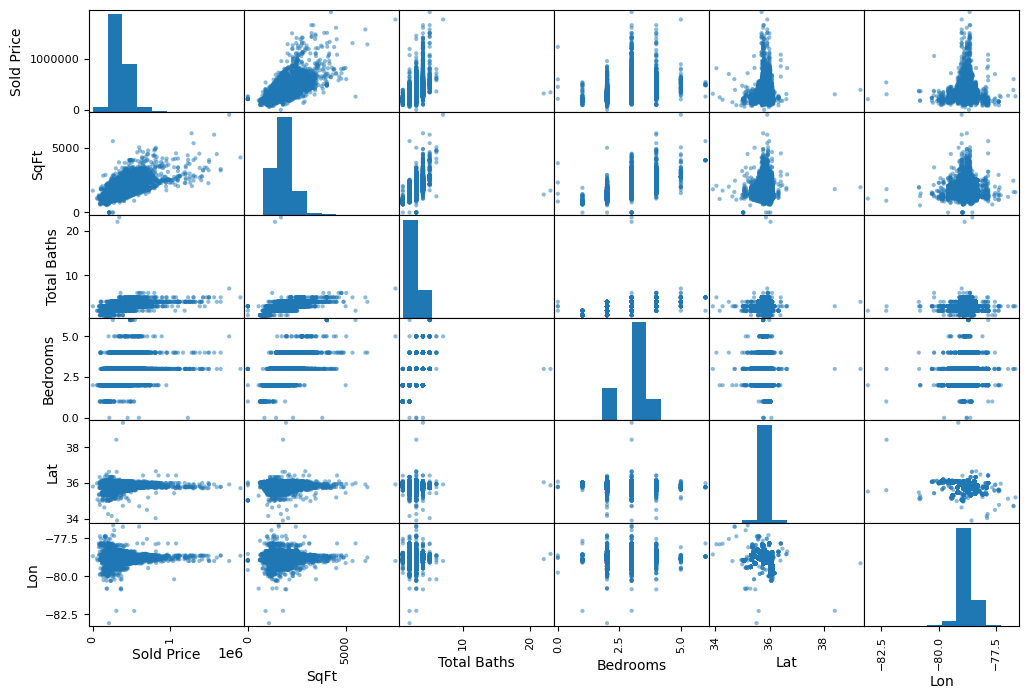

In [10]:
#Visualize the scatter matrix
scatter_columns = ["Sold Price", "SqFt", "Total Baths", "Bedrooms", 'Lat', 'Lon']
scatter_matrix(th_nostr_df[scatter_columns], figsize=(12, 8))
#plt.savefig('matrix.png')

<Axes: xlabel='SqFt', ylabel='Sold Price'>

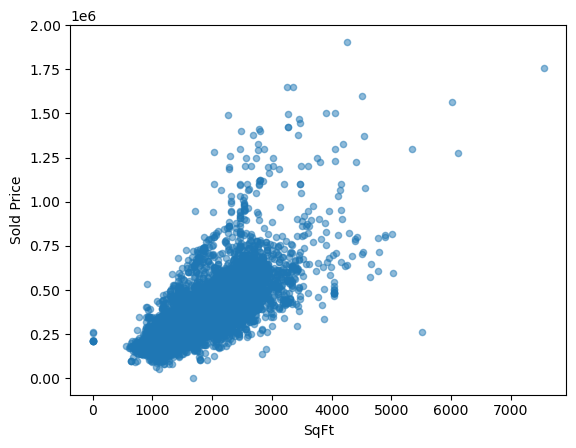

In [11]:
#Visualize the scatter plot for Total Living Area SqFt vs Sold Price
th_nostr_df.plot(kind="scatter", x="SqFt", y="Sold Price", alpha=0.5)

In [12]:
#Create a new column for the price per square foot
th_nostr_df['Price per SqFt'] = th_nostr_df['Sold Price'] / th_nostr_df['SqFt']

#Create a correlation matrix to see what the correlation is for Price per SqFt
corr_matrix = th_nostr_df.corr()
corr_matrix["Sold Price"].sort_values(ascending=False)

Sold Price        1.000000
List Price        0.989237
SqFt              0.726106
Total Baths       0.436091
Bedrooms          0.397907
Mortgage Rates    0.226282
Days on Market    0.098561
Over Asking       0.037506
Year Built        0.027309
Lat               0.022441
Price per SqFt   -0.019026
Acres            -0.031226
Zip              -0.039418
Lon              -0.091973
Name: Sold Price, dtype: float64

In [13]:
#Check the orginal data frame to see how many cities are in the data
len(th_df['City'].value_counts())

40

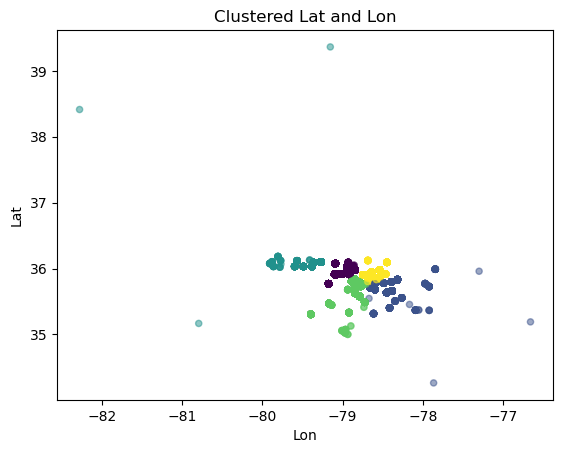

In [14]:
#Cluster the Lat and  Lon into groups
from sklearn.cluster import KMeans
th_df['Cluster'] = KMeans(n_clusters=5).fit_predict(th_df[['Lat', 'Lon']])
th_df.plot(kind="scatter", x="Lon", y="Lat", c="Cluster", cmap='viridis', colorbar=False, alpha=0.5)
plt.title('Clustered Lat and Lon')
plt.savefig('clustered.png')


In [15]:
#Create a variable for the top 10 cities with the highest average sold price
top10 = th_df.groupby('City')['Sold Price'].mean().nlargest(373).reset_index()

#Plot the top 10 cities with the highest average sold price
fig = px.bar(top10, x='City', y='Sold Price',color='City', template='plotly',
             title='Cities with Highest Avg. Sold Price') 
fig.update_traces(textposition='outside')
fig.show()

In [16]:
top10 = th_df.groupby('City')['Total Baths'].mean().nlargest(10).reset_index()

fig = px.bar(top10, x='City', y='Total Baths',color='Total Baths', template='plotly', 
             title='Top 10 Cities with the Most Avg Total Baths')
fig.update_traces(texttemplate='%{y:.}', textposition='outside')
fig.show()

In [17]:
df_mean = th_df.groupby('Over Asking')['SqFt'].mean().reset_index()

fig = px.scatter(df_mean, x='Over Asking', y='SqFt', trendline='ols', 
                 labels={'Over Asking':'Over Asking', 'SqFt':'Mean House Size'})
fig.update_layout(title='Distribution of Mean House Size by Over Asking')
fig.show()

In [18]:
fig = px.scatter(th_df, x='SqFt', y='Over Asking', color='Bedrooms', size='Total Baths',trendline='ols')
fig.update_layout(title='House Size vs Over Asking',
                  xaxis_title='House Size',
                  yaxis_title='Over Asking')
fig.show()

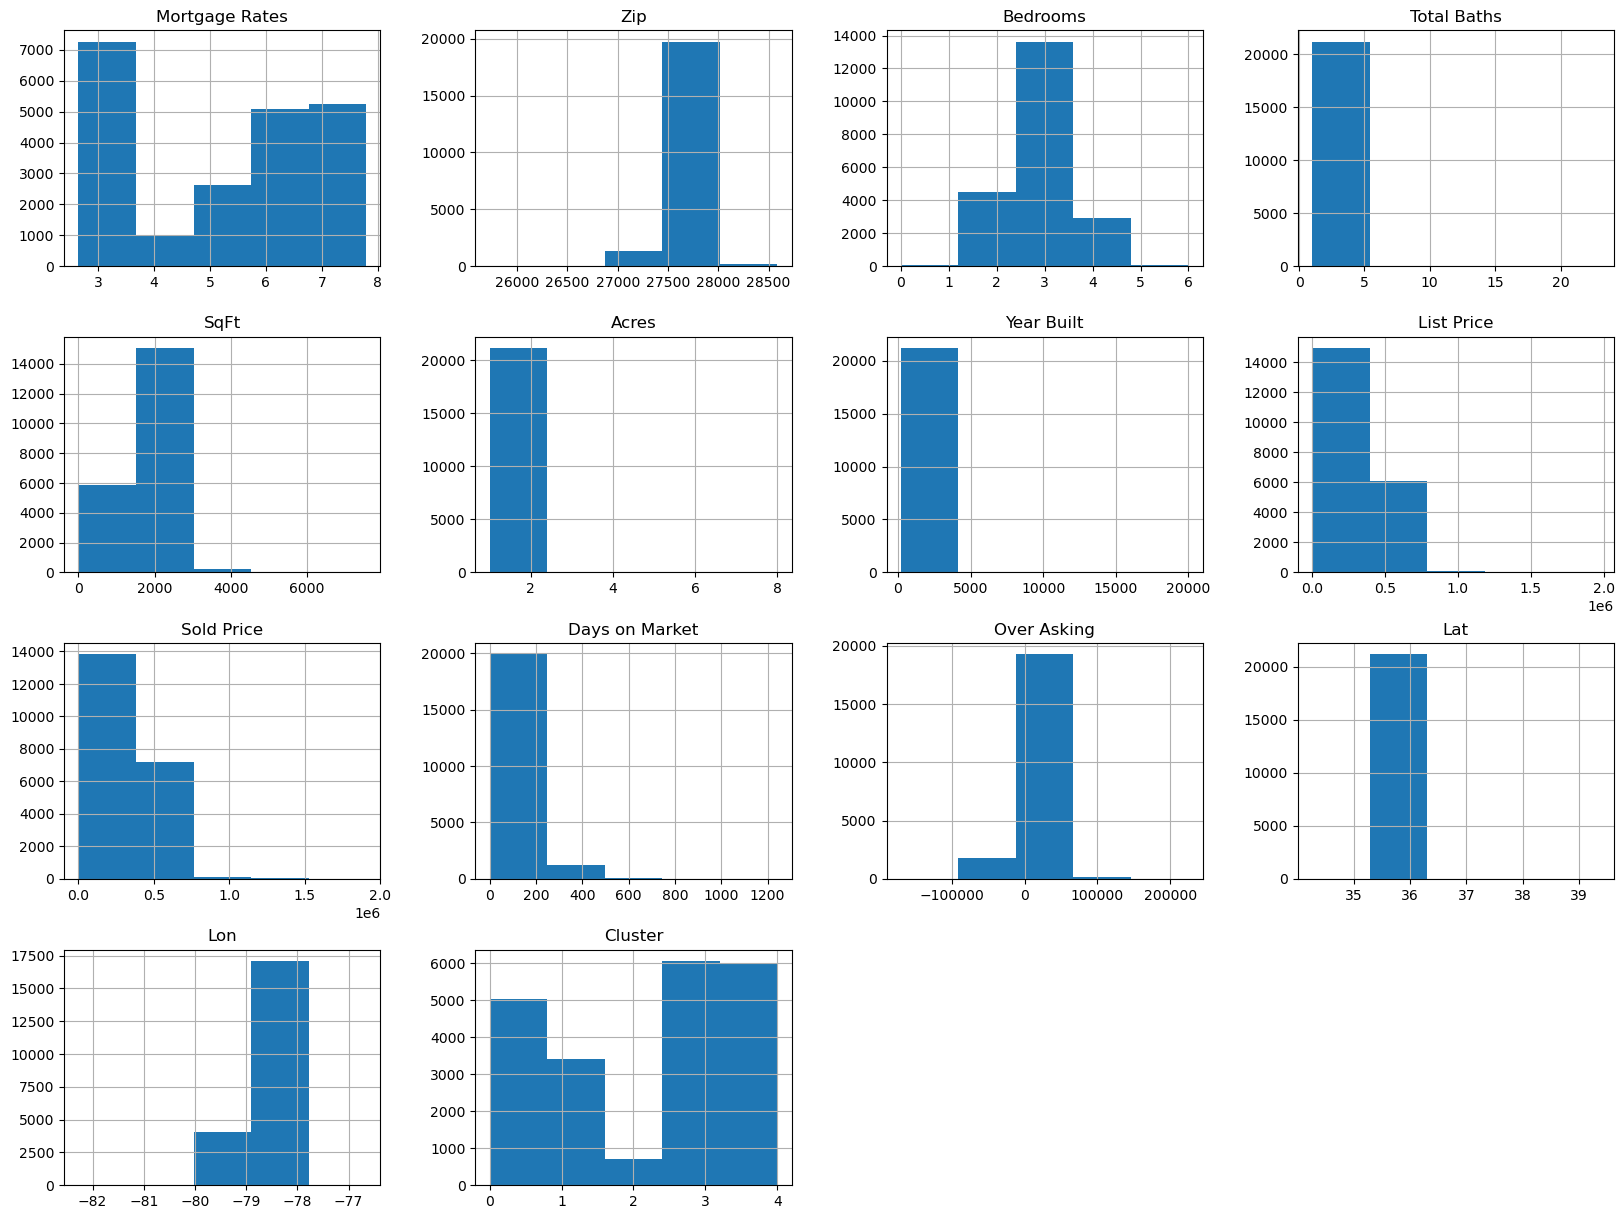

In [19]:
th_df.hist(bins=5, figsize=(20,15))
#plt.savefig("attribute_histogram_plots")
plt.show()

In [20]:
th_df.head()

,Mortgage Rates,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon,Cluster
39,2.65,2326790,Durham,27707,3,4,2339,1,2020,2020-06-24,2021-01-08,301980,319129,198,17149,35.9631,-78.9315,0
41,2.65,2356953,Wake Forest,27587,3,3,1570,1,2002,2020-12-08,2021-01-06,199000,215000,29,16000,35.9815,-78.5392,4
55,2.65,2352181,Cary,27511,3,3,1464,1,1992,2020-11-05,2021-01-05,249900,264774,61,14874,35.7641,-78.7786,3
61,2.65,2323642,Raleigh,27603,3,4,1732,1,2020,2020-06-07,2021-01-08,283645,296550,215,12905,35.7076,-78.6563,1
62,2.65,2352460,Durham,27713,3,4,2337,1,1985,2020-11-06,2021-01-08,229900,242500,63,12600,35.9112,-78.9178,0


In [21]:
# Variable with the Longitude and Latitude
X=th_df.loc[:,['MLS #','Lat','Lon']]
X.head(10)

,MLS #,Lat,Lon
39,2326790,35.9631,-78.9315
41,2356953,35.9815,-78.5392
55,2352181,35.7641,-78.7786
61,2323642,35.7076,-78.6563
62,2352460,35.9112,-78.9178
82,2355972,35.7667,-78.6008
90,2355149,35.8072,-78.8870
109,2354789,35.9112,-78.9178
113,2355253,35.9112,-78.9178
123,2355548,36.0756,-79.0914


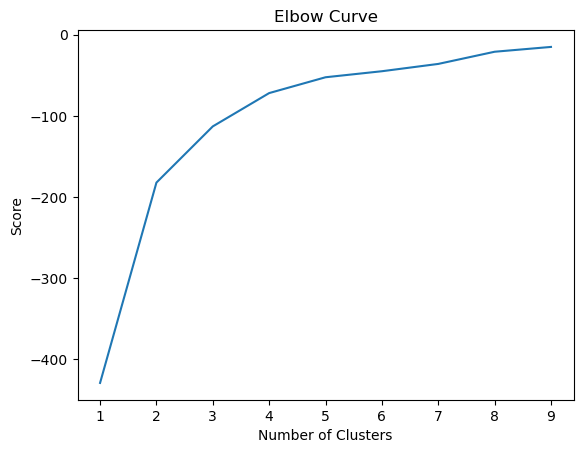

In [22]:
#kmeans 
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = th_df[['Lat']]
X_axis = th_df[['Lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [23]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,MLS #,Lat,Lon,cluster_label
39,2326790,35.9631,-78.9315,3
41,2356953,35.9815,-78.5392,1
55,2352181,35.7641,-78.7786,0
61,2323642,35.7076,-78.6563,1
62,2352460,35.9112,-78.9178,3
82,2355972,35.7667,-78.6008,1
90,2355149,35.8072,-78.8870,0
109,2354789,35.9112,-78.9178,3
113,2355253,35.9112,-78.9178,3
123,2355548,36.0756,-79.0914,3


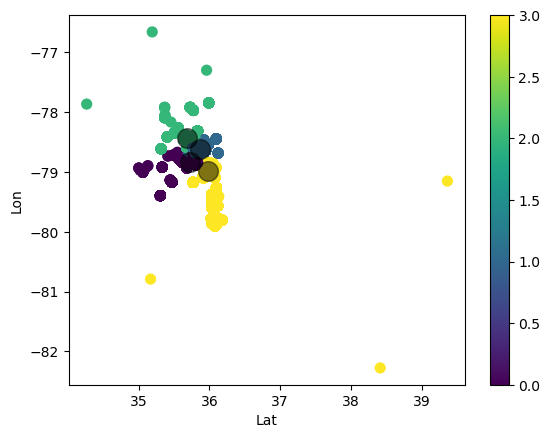

In [24]:
X.plot.scatter(x = 'Lat', y = 'Lon', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

<Axes: xlabel='SqFt'>

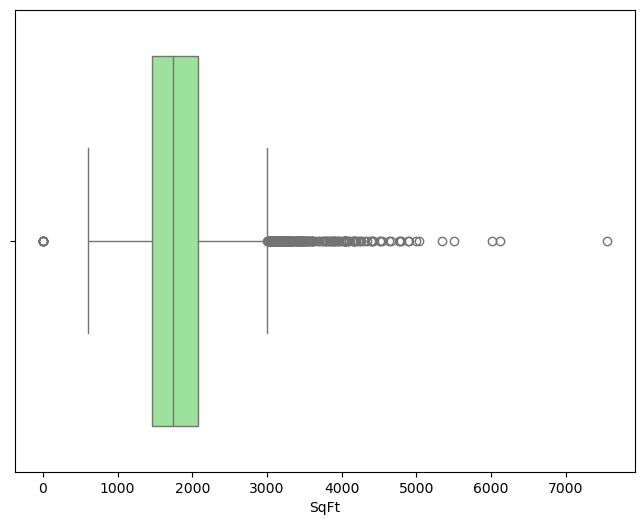

In [25]:
#Visualize the distribution of each numerical feature using box plots. Points beyond the “whiskers” of the box plot can be considered potential outliers.  
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['SqFt'], color='lightgreen')

<Axes: xlabel='Bedrooms'>

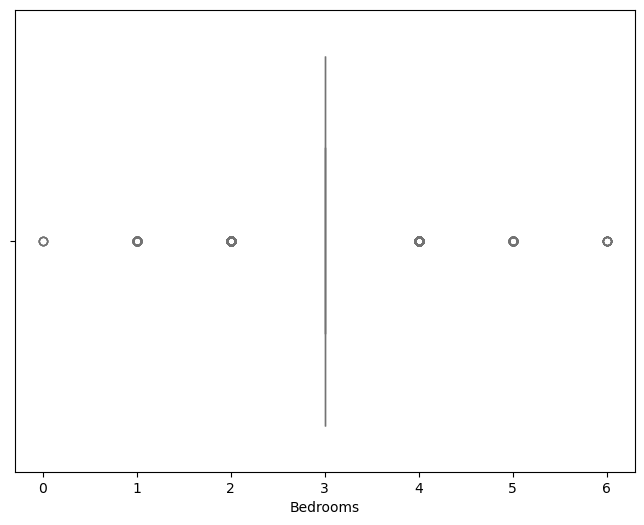

In [26]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['Bedrooms'], color='lightgreen')

<Axes: xlabel='Total Baths'>

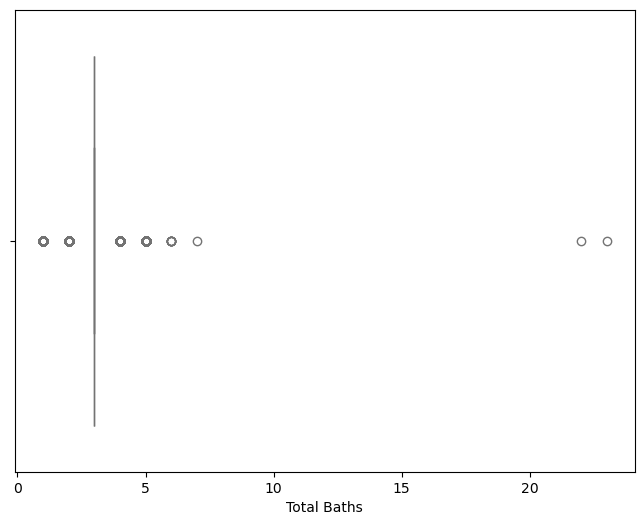

In [27]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['Total Baths'], color='lightgreen')

<Axes: xlabel='Acres'>

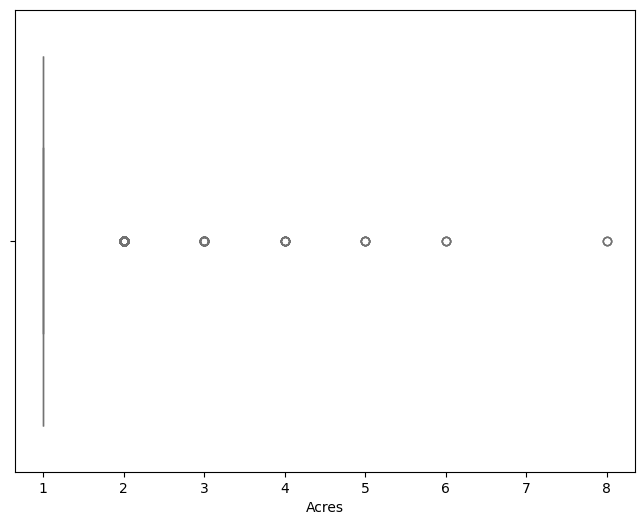

In [28]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['Acres'], color='lightgreen')

<Axes: xlabel='Days on Market'>

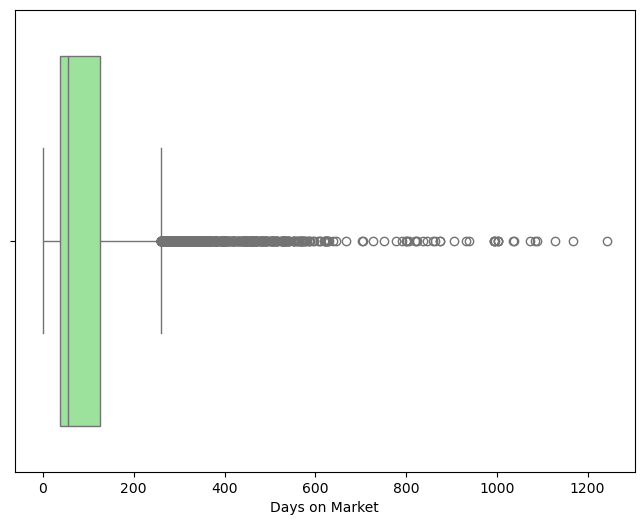

In [29]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['Days on Market'], color='lightgreen')

<Axes: xlabel='Year Built'>

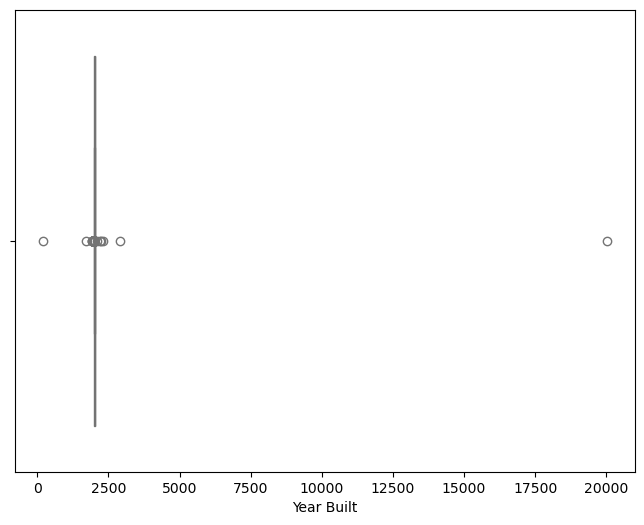

In [30]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=th_df['Year Built'], color='lightgreen')

In [31]:
#Add the Price per SqFt to this data frame
th_df["Price per SqFt"] = th_df["Sold Price"]/th_df["SqFt"]
th_df.head()

,Mortgage Rates,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon,Cluster,Price per SqFt
39,2.65,2326790,Durham,27707,3,4,2339,1,2020,2020-06-24,2021-01-08,301980,319129,198,17149,35.9631,-78.9315,0,136.438221
41,2.65,2356953,Wake Forest,27587,3,3,1570,1,2002,2020-12-08,2021-01-06,199000,215000,29,16000,35.9815,-78.5392,4,136.942675
55,2.65,2352181,Cary,27511,3,3,1464,1,1992,2020-11-05,2021-01-05,249900,264774,61,14874,35.7641,-78.7786,3,180.856557
61,2.65,2323642,Raleigh,27603,3,4,1732,1,2020,2020-06-07,2021-01-08,283645,296550,215,12905,35.7076,-78.6563,1,171.218245
62,2.65,2352460,Durham,27713,3,4,2337,1,1985,2020-11-06,2021-01-08,229900,242500,63,12600,35.9112,-78.9178,0,103.765511


In [32]:
#Drop all the rows with values higher than 6 for the Total Baths column
th_df = th_df[th_df['Total Baths'] < 6]

In [33]:
#Drop all the rows with values equal to 0 for the Bedrooms column
th_df = th_df[th_df['Bedrooms'] != 0]

In [34]:
#Drop all the rows with values higher than 2025 for the Year Built column
th_df = th_df[th_df['Year Built'] < 2025]

In [35]:
#Drop all the rows with values below 1935 for the Year Built column
th_df = th_df[th_df['Year Built'] > 1935]

In [36]:
#Drop all the rows with values of 0 for the SqFt column
th_df = th_df[th_df['SqFt'] != 0]

In [37]:
#Drop all the rows with a value of 0 for the Zip Code column
th_df = th_df[th_df['Zip'] != 0]

In [38]:
#Drop all the rows with a value of 0 for the Sold Price column
th_df = th_df[th_df['Sold Price'] != 0]

In [39]:
th_df = th_df[th_df['SqFt'] != 1]

In [40]:
th_df.sort_values("SqFt", ascending=True)
th_df.head()

,Mortgage Rates,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon,Cluster,Price per SqFt
39,2.65,2326790,Durham,27707,3,4,2339,1,2020,2020-06-24,2021-01-08,301980,319129,198,17149,35.9631,-78.9315,0,136.438221
41,2.65,2356953,Wake Forest,27587,3,3,1570,1,2002,2020-12-08,2021-01-06,199000,215000,29,16000,35.9815,-78.5392,4,136.942675
55,2.65,2352181,Cary,27511,3,3,1464,1,1992,2020-11-05,2021-01-05,249900,264774,61,14874,35.7641,-78.7786,3,180.856557
61,2.65,2323642,Raleigh,27603,3,4,1732,1,2020,2020-06-07,2021-01-08,283645,296550,215,12905,35.7076,-78.6563,1,171.218245
62,2.65,2352460,Durham,27713,3,4,2337,1,1985,2020-11-06,2021-01-08,229900,242500,63,12600,35.9112,-78.9178,0,103.765511


In [41]:
# Save the DataFrame to a CSV file
th_df.to_csv('Clean_Data/mls_th_cleaned.csv', index=False)